In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.__version__, np.__version__

(u'0.17.1', '1.10.1')

In [3]:
Boston = pd.read_csv('../data_sets/Boston.csv')
print Boston.shape
print Boston.columns
Boston.head()

(506, 14)
Index([u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis',
       u'rad', u'tax', u'ptratio', u'black', u'lstat', u'medv'],
      dtype='object')


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.__version__

'1.5.0'

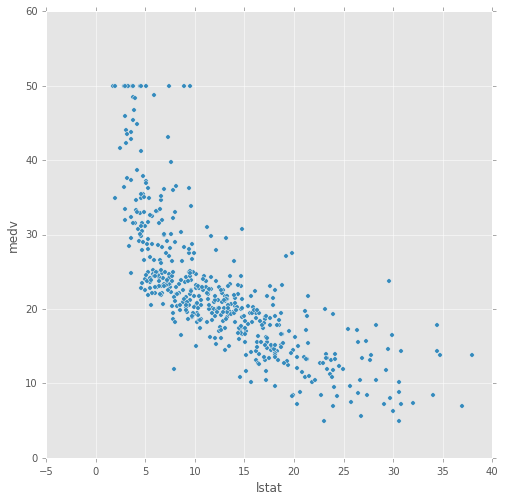

In [5]:
Boston.plot(kind='scatter', x='lstat', y='medv', figsize=(8,8))

## line fit with numpy
Source: http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html

### fit1 - linear model (polyfit / linspace)

In [6]:
z = np.polyfit(Boston.lstat, Boston.medv, 1)
print 'slope: %.2f\nintercept: %.2f' % (z[0],z[1])

p = np.poly1d(z)
print p, '\n'

xp = np.linspace(-5, 40, 100)
print xp

slope: -0.95
intercept: 34.55
 
-0.95 x + 34.55 

[ -5.          -4.54545455  -4.09090909  -3.63636364  -3.18181818
  -2.72727273  -2.27272727  -1.81818182  -1.36363636  -0.90909091
  -0.45454545   0.           0.45454545   0.90909091   1.36363636
   1.81818182   2.27272727   2.72727273   3.18181818   3.63636364
   4.09090909   4.54545455   5.           5.45454545   5.90909091
   6.36363636   6.81818182   7.27272727   7.72727273   8.18181818
   8.63636364   9.09090909   9.54545455  10.          10.45454545
  10.90909091  11.36363636  11.81818182  12.27272727  12.72727273
  13.18181818  13.63636364  14.09090909  14.54545455  15.          15.45454545
  15.90909091  16.36363636  16.81818182  17.27272727  17.72727273
  18.18181818  18.63636364  19.09090909  19.54545455  20.          20.45454545
  20.90909091  21.36363636  21.81818182  22.27272727  22.72727273
  23.18181818  23.63636364  24.09090909  24.54545455  25.          25.45454545
  25.90909091  26.36363636  26.81818182  27.27272727 

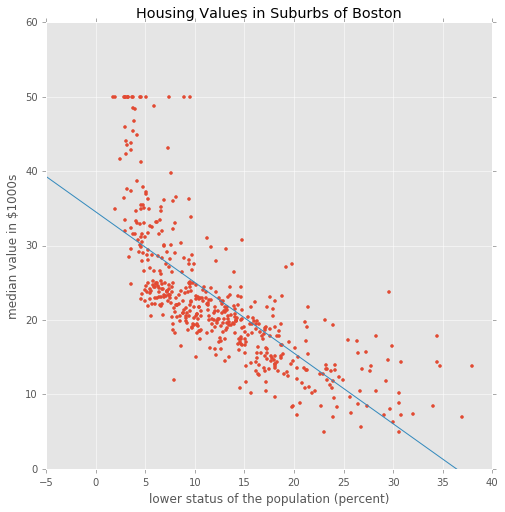

In [7]:
fig = plt.figure(figsize=(8,8))
plt.plot(Boston.lstat, Boston.medv, '.', xp, p(xp), '-')
plt.xlabel('lower status of the population (percent)')
plt.ylabel('median value in $1000s')
plt.ylim(0,60)
plt.title('Housing Values in Suburbs of Boston')

In [8]:
# predict medv for list of lstat values
lstat_vals = [5, 10, 15]
medv_pred = [p(x) for x in lstat_vals]
medv_pred

[29.803594110593117, 25.053347341803171, 20.303100573013225]

### fit1 - linear model (linalg)
Source: http://stackoverflow.com/questions/17679140/multiple-linear-regression-with-python

In [9]:
x = Boston.lstat
y = Boston.medv
n = np.max(x.shape)
X = np.vstack([np.ones(n), x]).T

np.linalg.lstsq(X,y)

(array([ 34.55384088,  -0.95004935]),
 array([ 19472.38141833]),
 2,
 array([ 327.33368848,   11.02790503]))

### fit2 - multiple linear regression

In [10]:
x1 = Boston.lstat
x2 = Boston.age
y = Boston.medv
n = np.max(x.shape)
X = np.vstack([np.ones(n), x1, x2]).T

np.linalg.lstsq(X,y)

(array([ 33.22276053,  -1.03206856,   0.03454434]),
 array([ 19168.12860876]),
 3,
 array([ 1694.28048854,   127.3808657 ,     8.44568021]))

### ...
### fit5, 6, & 7 - nonlinear terms & interactions

In [11]:
# fit5: medv~lstat*age
x1 = Boston.lstat
x2 = Boston.age
x3 = x1 * x2
y = Boston.medv
n = np.max(x.shape)
X = np.vstack([np.ones(n), x1, x2, x3]).T

np.linalg.lstsq(X,y)

(array([  3.60885359e+01,  -1.39211684e+00,  -7.20859509e-04,
          4.15595185e-03]),
 array([ 18977.71614459]),
 4,
 array([  2.86327168e+04,   7.19830139e+02,   7.05317683e+01,
          4.16316825e+00]))

In [12]:
# fit6: medv ~ lstat + I(lstat**2)
x1 = Boston.lstat
x2 = Boston.lstat ** 2

y = Boston.medv
n = np.max(x.shape)
X = np.vstack([np.ones(n), x1, x2]).T

np.linalg.lstsq(X,y)

(array([ 42.86200733,  -2.3328211 ,   0.04354689]),
 array([ 15347.24315838]),
 3,
 array([  7.12465104e+03,   1.18998689e+02,   6.27971688e+00]))

## OLS with statsmodels
Source: http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html

In [13]:
import statsmodels.api as sm

### fit1 - linear model

In [14]:
X = Boston.lstat
X = sm.add_constant(X)

In [15]:
model = sm.OLS(Boston.medv, X)
fit1 = model.fit()
print fit1.summary()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 22 Feb 2016   Prob (F-statistic):           5.08e-88
Time:                        16:31:46   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [16]:
# OLS parameters
# intercept & slope
b, m = fit1.params
print b, m

34.5538408794 -0.950049353758


In [17]:
print 'Confidence Interval\n', fit1.conf_int()
print '\nResiduals Summary\n', fit1.resid.describe()
print '\nResiduals (Squared) Sum\n', np.sum(np.square(fit1.resid))

Confidence Interval
               0          1
const  33.448457  35.659225
lstat  -1.026148  -0.873951

Residuals Summary
count    5.060000e+02
mean     6.989578e-15
std      6.209603e+00
min     -1.516745e+01
25%     -3.989612e+00
50%     -1.318186e+00
75%      2.033701e+00
max      2.450013e+01
dtype: float64

Residuals (Squared) Sum
19472.3814183


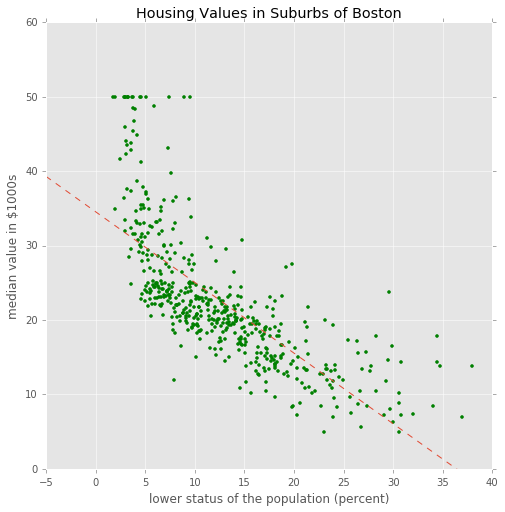

In [18]:
fig = plt.figure(figsize=(8,8))
plt.plot(Boston.lstat, Boston.medv, 'g.', xp, m*xp + b, '--')
plt.xlabel('lower status of the population (percent)')
plt.ylabel('median value in $1000s')
plt.ylim(0,60)
plt.title('Housing Values in Suburbs of Boston')

Source: http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/predict.html

In [19]:
# prediction
fit1.predict(X)
X.shape
x1n = np.linspace(5,15, 3)
Xnew = np.reshape(x1n, (len(x1n),1))
Xnew = sm.add_constant(Xnew)
ynewpred =  fit1.predict(Xnew) # predict out of sample
print(ynewpred)

[ 29.80359411  25.05334734  20.30310057]


### plot with upper & lower confidence intervals

Source: http://statsmodels.sourceforge.net/devel/examples/generated/example_ols.html

In [20]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

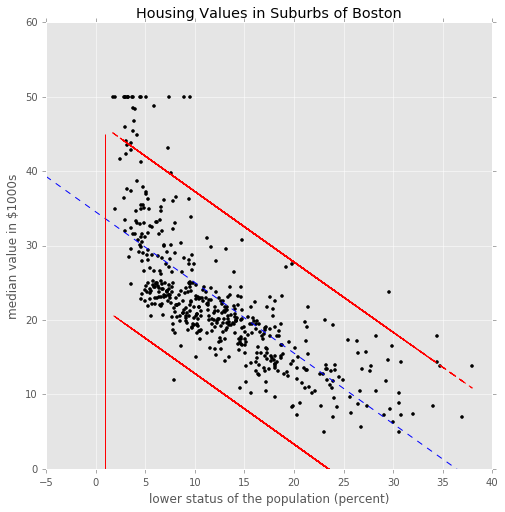

In [22]:
fig = plt.figure(figsize=(8,8))
plt.plot(Boston.lstat, Boston.medv, 'k.', xp, m*xp + b, 'b--')
# Confidence intervals around the predictions are built using wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(fit1)
plt.plot(X, iv_u, 'r--')
plt.plot(X, iv_l, 'r--')
plt.xlabel('lower status of the population (percent)')
plt.ylabel('median value in $1000s')
plt.ylim(0,60)
plt.title('Housing Values in Suburbs of Boston')

### fit2 - multiple linear regression
Source: http://www.datarobot.com/blog/multiple-regression-using-statsmodels/

In [23]:
X = Boston[['lstat', 'age']]
y = Boston.medv

In [24]:
X = sm.add_constant(X)
fit2 = sm.OLS(y, X).fit()

In [25]:
print fit2.summary()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 22 Feb 2016   Prob (F-statistic):           2.98e-88
Time:                        16:33:33   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

### fit3 & 4 - R-style formulas
Source: http://statsmodels.sourceforge.net/devel/example_formulas.html

In [26]:
import statsmodels.formula.api as smf

In [27]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
Boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [29]:
# patsy: 0.4.1+dev
# used to correct error message for fit3:
# ValueError: For numerical factors, num_columns must be an int.
# Source: https://groups.google.com/forum/#!topic/pystatsmodels/KcSzNqDxv-Q
sm.show_versions()


INSTALLED VERSIONS
------------------
Python: 2.7.11.final.0

Statsmodels

Installed: 0.6.1 (C:\Anaconda2\lib\site-packages\statsmodels)

Required Dependencies

cython: 0.23.4 (C:\Anaconda2\lib\site-packages\Cython)
numpy: 1.10.1 (C:\Anaconda2\lib\site-packages\numpy)
scipy: 0.16.0 (C:\Anaconda2\lib\site-packages\scipy)
pandas: Cannot detect version (C:\Anaconda2\lib\site-packages\pandas)
    dateutil: 2.4.2 (C:\Anaconda2\lib\site-packages\dateutil)
patsy: 0.4.1+dev (C:\Anaconda2\lib\site-packages\patsy)

Optional Dependencies

matplotlib: 1.5.0 (C:\Anaconda2\lib\site-packages\matplotlib)
cvxopt: Not installed

Developer Tools

IPython: 4.0.0 (C:\Anaconda2\lib\site-packages\IPython)
    jinja2: 2.8 (C:\Anaconda2\lib\site-packages\jinja2)
sphinx: 1.3.1 (c:\anaconda2\lib\site-packages\sphinx-1.3.1-py2.7.egg\sphinx)
    pygments: 2.0.2 (C:\Anaconda2\lib\site-packages\pygments)
nose: 1.3.7 (C:\Anaconda2\lib\site-packages\nose)
virtualenv: Not installed




In [30]:
fit3 = smf.ols(formula='medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat', 
               data=Boston).fit()
print fit3.summary()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 22 Feb 2016   Prob (F-statistic):          6.72e-135
Time:                        16:33:34   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [31]:
f = 'medv ~ crim+zn+chas+nox+rm+dis+rad+tax+ptratio+black+lstat'
fit4 = smf.ols(formula=f, data=Boston).fit()
print fit4.summary()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 22 Feb 2016   Prob (F-statistic):          5.54e-137
Time:                        16:33:34   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

## fit5, 6, & 7 - nonlinear terms & interactions

In [32]:
fit5 = smf.ols(formula='medv~lstat*age', data=Boston).fit()
print fit5.summary()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 22 Feb 2016   Prob (F-statistic):           4.86e-88
Time:                        16:33:34   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

In [33]:
fit6 = smf.ols(formula='medv ~ lstat + I(lstat**2)', data=Boston).fit()
print fit6.summary()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 22 Feb 2016   Prob (F-statistic):          1.56e-112
Time:                        16:33:34   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

In [34]:
fit7 = smf.ols(formula='medv ~ lstat + I(lstat**2) + I(lstat**3) + I(lstat**4)', data=Boston).fit()

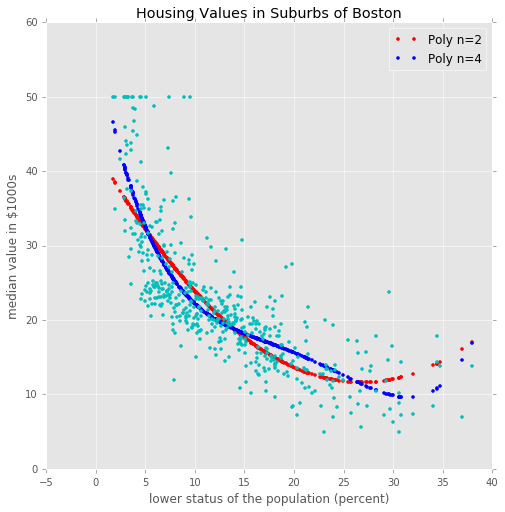

In [35]:
fig = plt.figure(figsize=(8,8))

plt.xlabel('lower status of the population (percent)')
plt.ylabel('median value in $1000s')
plt.xlim(-5,40)
plt.ylim(0,60)
plt.title('Housing Values in Suburbs of Boston')

# plot polynomial lines
plt.plot(Boston.lstat, fit6.predict(Boston), 'r.', label='Poly n=2')
plt.plot(Boston.lstat, fit7.predict(Boston), 'b.', label='Poly n=4')
plt.legend()
plt.plot(Boston.lstat, Boston.medv, 'c.')

## sklearn
Source: http://scikit-learn.org/stable/modules/linear_model.html

In [36]:
from sklearn import linear_model

In [37]:
from sklearn.metrics import mean_squared_error

### fit1 - linear model

In [38]:
clf1 = linear_model.LinearRegression()

In [39]:
X = Boston.lstat
X = X.reshape((len(X), 1))    # require matrix shape
y = Boston.medv


clf1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
print 'Coefficient: %.2f\nIntercept: %.2f' % (clf1.coef_, clf1.intercept_)

Coefficient: -0.95
Intercept: 34.55


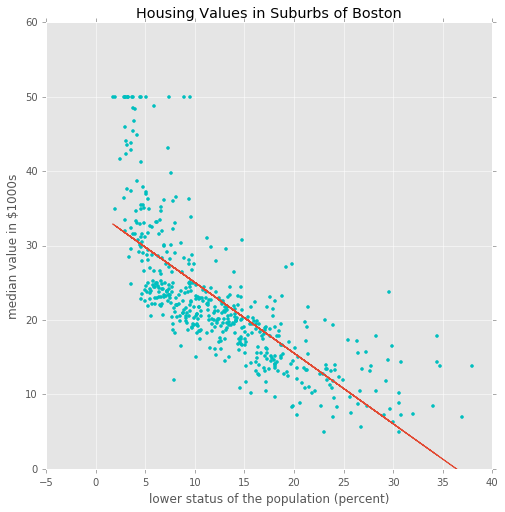

In [41]:
fig = plt.figure(figsize=(8,8))
plt.plot(X, y, 'c.')
plt.xlabel('lower status of the population (percent)')
plt.xlim(-5,40)
plt.ylabel('median value in $1000s')
plt.ylim(0,60)
plt.title('Housing Values in Suburbs of Boston')
plt.plot(X, clf1.predict(X))

Source: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#example-linear-model-plot-ols-py

In [42]:
print "Residual sum of squares: %.2f" % np.sum((clf1.predict(X) - y) ** 2)

Residual sum of squares: 19472.38


In [43]:
mean_squared_error(y, clf1.predict(X))

38.482967229894143

In [44]:
# prediction
x1n = np.linspace(5,15, 3)
Xnew = np.reshape(x1n, (len(x1n),1))    # do NOT add column of 1's
clf1.predict(Xnew)

array([ 29.80359411,  25.05334734,  20.30310057])

### fit2 - multiple linear regression

In [45]:
clf2 = linear_model.LinearRegression()

In [46]:
X = Boston[['lstat', 'age']]
y = Boston.medv

clf2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
print "'lstat': \t%.2f\n'age': \t\t%.2f" % (clf2.coef_[0], clf2.coef_[1])
print 'Intercept: \t%.2f' % clf2.intercept_

'lstat': 	-1.03
'age': 		0.03
Intercept: 	33.22


In [48]:
mean_squared_error(y, clf2.predict(X))

37.881677092412673

### ...
### fit5, 6, & 7 - nonlinear terms & interactions

In [50]:
# fit5: medv~lstat*age
clf5 = linear_model.LinearRegression()

X = Boston[['lstat', 'age']]
X['lstat:age'] = X.lstat * X.age
y = Boston.medv

clf5.fit(X, y)

print "'lstat': \t%.4f\n'age': \t\t%.4f\n'lstat:age': \t%.4f" % (clf5.coef_[0], clf5.coef_[1], clf5.coef_[2])
print 'Intercept: \t%.4f' % clf5.intercept_

print "MSE: \t\t%.2f" % mean_squared_error(y, clf5.predict(X))

'lstat': 	-1.3921
'age': 		-0.0007
'lstat:age': 	0.0042
Intercept: 	36.0885
MSE: 		37.51


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [51]:
# fit6: medv ~ lstat + I(lstat**2)
clf6 = linear_model.LinearRegression()

l = Boston.lstat
l2 = Boston.lstat ** 2

X6 = np.vstack((l, l2)).T
y = Boston.medv

clf6.fit(X6, y)
print "Coefficients: ", clf6.coef_
print "Intercept: ", clf6.intercept_
print "MSE: ", mean_squared_error(y, clf6.predict(X6))

Coefficients:  [-2.3328211   0.04354689]
Intercept:  42.8620073282
MSE:  30.3305200759


In [52]:
# fit7: medv ~ lstat + I(lstat**2) + I(lstat**3) + I(lstat**4)
clf7 = linear_model.LinearRegression()

l = Boston.lstat
l2 = Boston.lstat ** 2
l3 = Boston.lstat ** 3
l4 = Boston.lstat ** 4

X7 = np.vstack((l, l2, l3, l4)).T
y = Boston.medv

clf7.fit(X7, y)
print "Coefficients: ", clf7.coef_
print "Intercept: ", clf7.intercept_
print "MSE: ", mean_squared_error(y, clf7.predict(X7))

Coefficients:  [ -7.02846009e+00   4.95481136e-01  -1.63101703e-02   1.94867775e-04]
Intercept:  57.3099552185
MSE:  27.6041316505


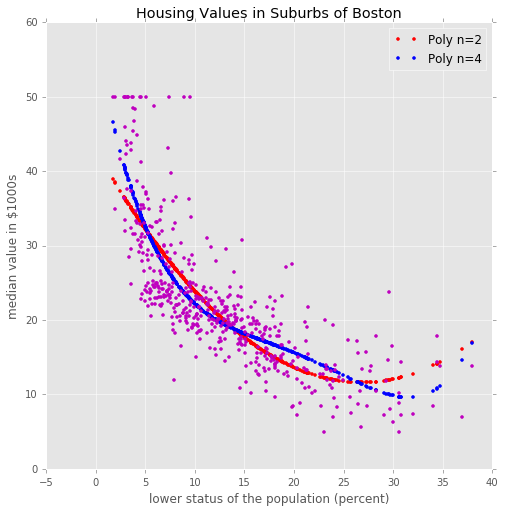

In [53]:
fig = plt.figure(figsize=(8,8))

plt.xlabel('lower status of the population (percent)')
plt.ylabel('median value in $1000s')
plt.xlim(-5,40)
plt.ylim(0,60)
plt.title('Housing Values in Suburbs of Boston')

# plot polynomial lines
plt.plot(Boston.lstat, clf6.predict(X6), 'r.', label='Poly n=2')
plt.plot(Boston.lstat, clf7.predict(X7), 'b.', label='Poly n=4')
plt.legend()
plt.plot(Boston.lstat, Boston.medv, 'm.')